THƯ VIỆN & LOAD DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv("trash_time_predict_dataset.csv")
print(df.head())
print(df.info())

   PH_Percent  KPH_Percent  Hour_Of_Day  Day_Of_Week  PH_Rate_Of_Change  \
0   37.454012    84.723658            1            5                1.0   
1   95.071431    49.451704            7            2                2.0   
2   73.199394    19.546561           14            6                1.0   
3   59.865848    73.664179           16            0                0.5   
4   15.601864    41.867814            5            4                5.0   

   KPH_Rate_Of_Change  Time_To_Full_PH  Time_To_Full_KPH  
0                 0.5        62.545988         30.552684  
1                 2.0         2.464285         25.274148  
2                 0.5        26.800606        160.906878  
3                10.0        80.268303          2.633582  
4                 0.5        16.879627        116.264373  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -------------

THỐNG KÊ DỮ LIỆU & BIỂU ĐỒ PHÂN BỐ

         PH_Percent   KPH_Percent   Hour_Of_Day   Day_Of_Week  \
count  50000.000000  50000.000000  50000.000000  50000.000000   
mean      49.886340     50.011310     11.473080      2.999400   
std       28.840639     28.827802      6.927712      1.998529   
min        0.000554      0.000843      0.000000      0.000000   
25%       24.890988     25.004654      5.000000      1.000000   
50%       49.889191     50.233692     11.000000      3.000000   
75%       74.830140     75.075820     17.000000      5.000000   
max       99.997215     99.999204     23.000000      6.000000   

       PH_Rate_Of_Change  KPH_Rate_Of_Change  Time_To_Full_PH  \
count       50000.000000        50000.000000     50000.000000   
mean            3.271750            3.306180        44.895600   
std             3.922407            3.972104        48.864412   
min             0.500000            0.500000         0.000861   
25%             0.500000            1.000000         7.896272   
50%             1.000000

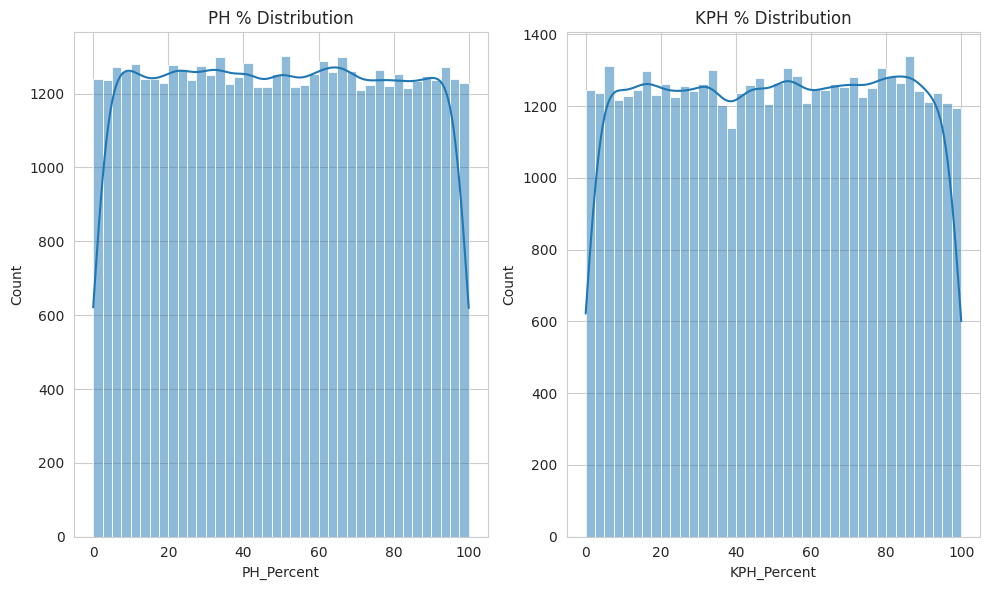

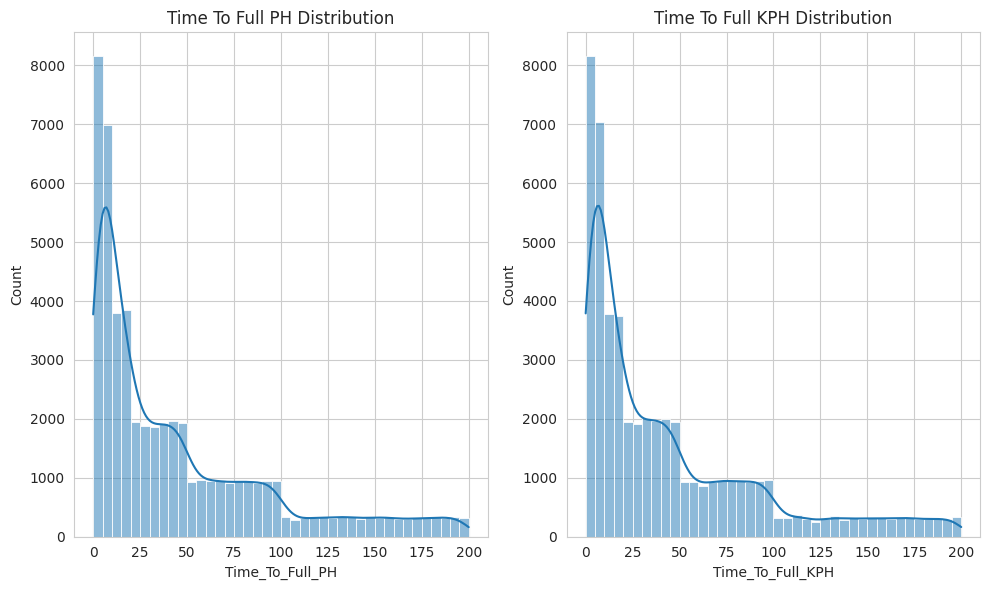

In [ ]:
print(df.describe())

# Biểu đồ phân bố PH/KPH %
fig, ax = plt.subplots(1, 2)
sns.histplot(df["PH_Percent"], kde=True, bins=40, ax=ax[0])
ax[0].set_title("PH % Distribution")
sns.histplot(df["KPH_Percent"], kde=True, bins=40, ax=ax[1])
ax[1].set_title("KPH % Distribution")
plt.tight_layout()
plt.show()

# Biểu đồ phân bố thời gian đầy
fig, ax = plt.subplots(1, 2)
sns.histplot(df["Time_To_Full_PH"], kde=True, bins=40, ax=ax[0])
ax[0].set_title("Time To Full PH Distribution")
sns.histplot(df["Time_To_Full_KPH"], kde=True, bins=40, ax=ax[1])
ax[1].set_title("Time To Full KPH Distribution")
plt.tight_layout()
plt.show()

MA TRẬN TƯƠNG QUAN

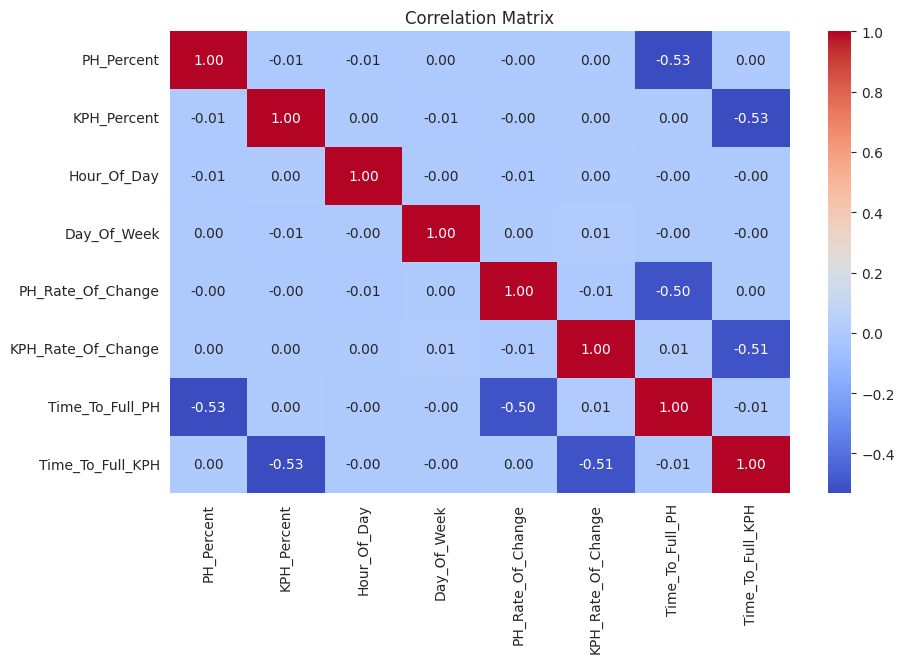

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

TÁCH DỮ LIỆU

In [ ]:
features = ["PH_Percent", "KPH_Percent", "Hour_Of_Day",
            "Day_Of_Week", "PH_Rate_Of_Change", "KPH_Rate_Of_Change"]

X = df[features]

y_PH = df["Time_To_Full_PH"]
y_KPH = df["Time_To_Full_KPH"]

X_train, X_test, y_train_PH, y_test_PH = train_test_split(
    X, y_PH, test_size=0.2, random_state=42
)

X_train2, X_test2, y_train_KPH, y_test_KPH = train_test_split(
    X, y_KPH, test_size=0.2, random_state=42
)

HUẤN LUYỆN MÔ HÌNH

In [ ]:
model_PH = RandomForestRegressor(n_estimators=200, random_state=42)
model_KPH = RandomForestRegressor(n_estimators=200, random_state=42)

model_PH.fit(X_train, y_train_PH)
model_KPH.fit(X_train2, y_train_KPH)

print("Huấn luyện hoàn tất!")

Huấn luyện hoàn tất!


ĐÁNH GIÁ MÔ HÌNH

In [ ]:
def eval_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n Đánh giá mô hình: {name}")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

eval_model(model_PH, X_test, y_test_PH, "PH Full Prediction")
eval_model(model_KPH, X_test2, y_test_KPH, "KPH Full Prediction")


 Đánh giá mô hình: PH Full Prediction
R2 Score: 0.9999999613475963
MAE: 0.0058077784736931095
RMSE: 0.00956323706763887

 Đánh giá mô hình: KPH Full Prediction
R2 Score: 0.999999959748608
MAE: 0.005947249789989241
RMSE: 0.00978550190521371


ĐỘ QUAN TRỌNG CỦA ĐẶC TRƯNG

              Feature  PH_Importance  KPH_Importance
4   PH_Rate_Of_Change   5.416430e-01    1.486969e-08
0          PH_Percent   4.583569e-01    2.520820e-08
1         KPH_Percent   2.569057e-08    4.601419e-01
2         Hour_Of_Day   2.265586e-08    2.389883e-08
3         Day_Of_Week   1.700721e-08    1.762936e-08
5  KPH_Rate_Of_Change   1.431805e-08    5.398580e-01


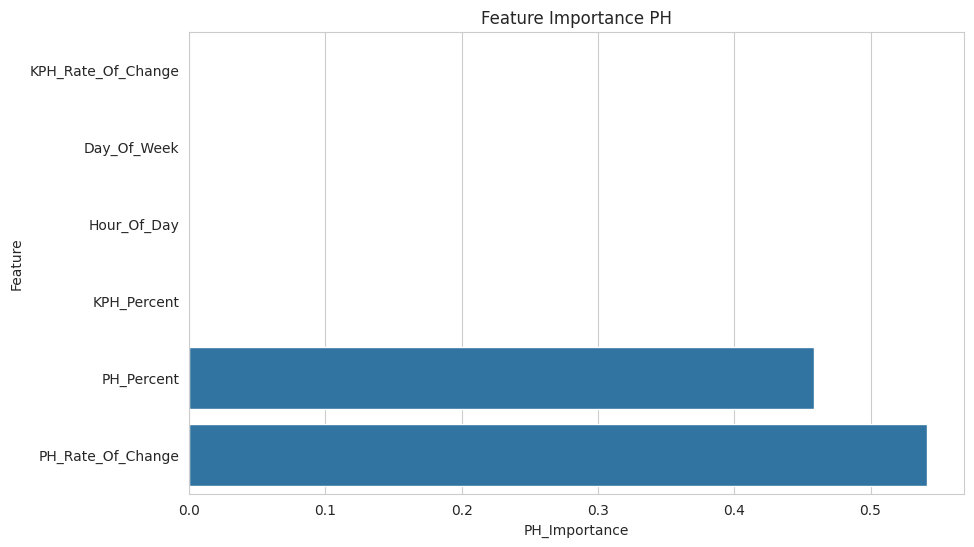

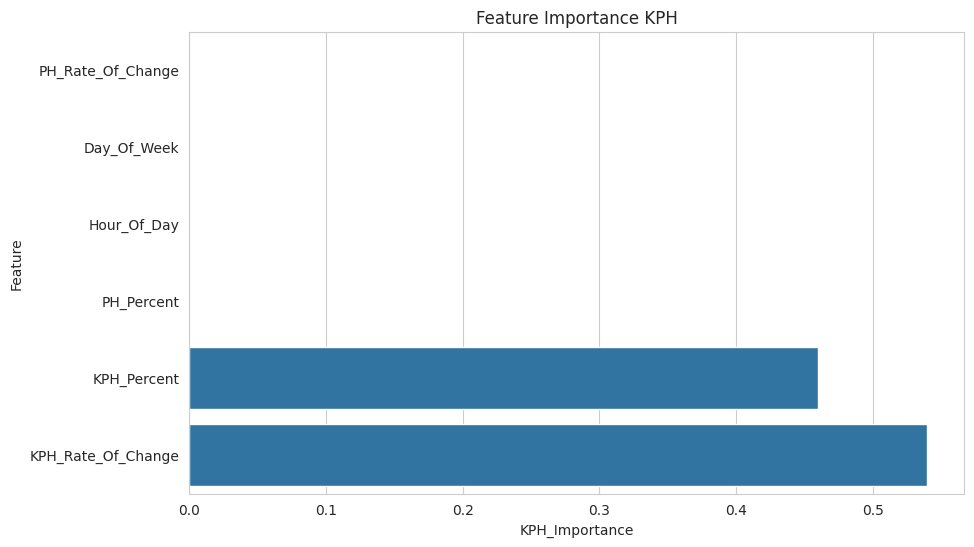

In [ ]:
importance = pd.DataFrame({
    "Feature": features,
    "PH_Importance": model_PH.feature_importances_,
    "KPH_Importance": model_KPH.feature_importances_,
})

print(importance.sort_values("PH_Importance", ascending=False))

sns.barplot(x="PH_Importance", y="Feature", data=importance.sort_values("PH_Importance"))
plt.title("Feature Importance PH")
plt.show()

sns.barplot(x="KPH_Importance", y="Feature", data=importance.sort_values("KPH_Importance"))
plt.title("Feature Importance KPH")
plt.show()

MODEL DÙNG CHO FLASK

In [ ]:
joblib.dump(model_PH, "model_PH.pkl")
joblib.dump(model_KPH, "model_KPH.pkl")

print("Đã lưu: model_PH.pkl & model_KPH.pkl")

Đã lưu: model_PH.pkl & model_KPH.pkl
